# Convolutional Neural Networks (CNN)
| Hyperparameter/Layer type | What does it do | Typical values |
|:-------------------------:|:---------------:|:--------------:|
| Input Image(s) | Target images you'd like to discover patterns in | Whatever you can take a photo or video of |
| Input Layer | Takes in target images and preprocesses theme for further layers | input_shape = [batch_size, image_height, image_width, color_channels] |
| Convolutional layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.keras.layers.ConvXD` (X can be multiple values) |
| Hidden activation | adds non-linearity to learned features (non-straight lines) | Usually ReLU |
| Pooling Layer | Reduces the dimensionality of learned image features | Average `tf.keras.layers.AvgPool2D` or Max `tf.keras.layers.MaxPool2D` |
| Fully connected layer | Futher refines learned features from convolution layers | `tf.keras.layers.Dense` |
| Output layer | Takeds learned features and outputs them in shape of target labels | output_shape = [number_of_classes] |
| Output activation | Adds non-linearities to output layer | Binary `tf.keras.activations.sigmoid` or Non-Binary `tf.keras.activations.softmax` |
```python
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu"
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keraslayers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
cnn_model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
history = cnn_model.fit(train_data, epochs=5)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
plt.style.use('dark_background')

In [5]:
# Get the data
import zipfile
import requests
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
def download_zip(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
# Example usage:
download_zip(url, 'pizza_steak.zip')
# Unzip the data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [7]:
# Inspect the data
import os
data_dir = 'pizza_steak'
for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak\test'
There are 0 directories and 250 images in 'pizza_steak\test\pizza'
There are 0 directories and 250 images in 'pizza_steak\test\steak'
There are 2 directories and 0 images in 'pizza_steak\train'
There are 0 directories and 750 images in 'pizza_steak\train\pizza'
There are 0 directories and 750 images in 'pizza_steak\train\steak'


In [8]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
# Create list of class names from sub directories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [34]:
# Visualize images
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
    target_folder = target_dir + '/' + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + '/' + random_image[0])
    print(f"Image Shape: {img.shape}")
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')


Image Shape: (512, 512, 3)


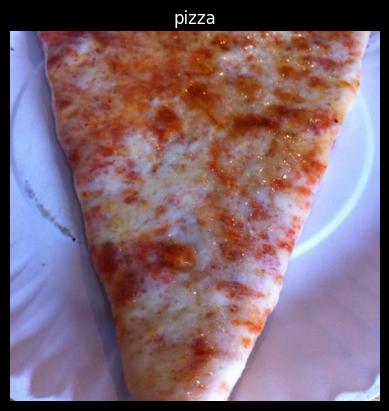

In [41]:
view_random_images('pizza_steak/train', 'pizza')

### Preprocessing image data

- Load images 
- Preprocess images
- Build a CNN to find patterns 
- Compile CNN
- Fit CNN to training data

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
tf.random.set_seed(42)

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224), # reshape to this size we want all images to be
    class_mode='binary',
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

# Build a CNN model from Tiny VGG architecture from CNN explainer website
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Fit the model
history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data), # number of batches per epoch
    
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 365ms/step - loss: 0.6584 - accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 17s 351ms/step - loss: 0.4967 - accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 16s 349ms/step - loss: 0.4371 - accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 17s 353ms/step - loss: 0.3886 - accuracy: 0.8353
Epoch 5/5
47/47 [==============================] - 17s 358ms/step - loss: 0.3464 - accuracy: 0.8573
